In [ ]:
#!wget http://sg-nex-data.s3.amazonaws.com/data/sequencing_data_ont/fastq/SGNex_Hct116_directcDNA_replicate3_run2/SGNex_Hct116_directcDNA_replicate3_run2.fastq.gz
#!wget http://sg-nex-data.s3.amazonaws.com/data/sequencing_data_ont/fastq/SGNex_Hct116_directcDNA_replicate4_run1/SGNex_Hct116_directcDNA_replicate4_run1.fastq.gz


In [34]:
!cd HCT116; gunzip SGNex_Hct116_directRNA_replicate4_run3.fastq.gz
#gunzip SGNex_Hct116_directRNA_replicate3_run4.fastq.gz
#gunzip SGNex_Hct116_directRNA_replicate4_run3.fastq.gz

In [35]:
import os

#os.system('perl -pe \'tr/uU/tT/ unless(/@+/)\''+' < '+'HCT116/SGNex_Hct116_directRNA_replicate3_run4'+'.fastq'+' > '+'HCT116/SGNex_Hct116_directRNA_replicate3_run4'+'.perlm.fastq')
#os.system('gzip '+'HCT116/SGNex_Hct116_directRNA_replicate3_run4'+'.perlm.fastq')

os.system('perl -pe \'tr/uU/tT/ unless(/@+/)\''+' < '+'HCT116/SGNex_Hct116_directRNA_replicate4_run3'+'.fastq'+' > '+'HCT116/SGNex_Hct116_directRNA_replicate4_run3'+'.perlm.fastq')
os.system('gzip '+'HCT116/SGNex_Hct116_directRNA_replicate4_run3'+'.perlm.fastq')

0

In [8]:
#!wget http://sg-nex-data.s3.amazonaws.com/data/annotations/transcriptome_fasta/hg38_sequins_SIRV_ERCCs_longSIRVs_cdna.fa

--2024-03-22 10:34:12--  http://sg-nex-data.s3.amazonaws.com/data/annotations/gtf_file/hg38_sequins_SIRV_ERCCs_longSIRVs_v5_reformatted.gtf
Resolving sg-nex-data.s3.amazonaws.com (sg-nex-data.s3.amazonaws.com)... 52.219.132.24, 52.219.184.57, 52.219.124.44, ...
Connecting to sg-nex-data.s3.amazonaws.com (sg-nex-data.s3.amazonaws.com)|52.219.132.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264174466 (252M) [binary/octet-stream]
Saving to: ‘hg38_sequins_SIRV_ERCCs_longSIRVs_v5_reformatted.gtf’

100%[======================================>] 264,174,466 4.87MB/s   in 64s    

2024-03-22 10:35:17 (3.95 MB/s) - ‘hg38_sequins_SIRV_ERCCs_longSIRVs_v5_reformatted.gtf’ saved [264174466/264174466]



In [28]:
!cd HCT116; \
 kallisto='/home/rebekah/kallisto_synced/kallisto/build/src/kallisto'; \
${kallisto} index -k 31 -i sequins.k-31.idx hg38_sequins_SIRV_ERCCs_longSIRVs_cdna.fa -t 32
!cd HCT116; \
 kallisto='/home/rebekah/kallisto_synced/kallisto/build/src/kallisto'; \
${kallisto} index -k 63 -i sequins.k-63.idx hg38_sequins_SIRV_ERCCs_longSIRVs_cdna.fa -t 32


[build] loading fasta file hg38_sequins_SIRV_ERCCs_longSIRVs_cdna.fa
[build] k-mer length: 31
[build] warning: clipped off poly-A tail (longer than 10)
        from 1549 target sequences
[build] warning: replaced 4 non-ACGUT characters in the input sequence
        with pseudorandom nucleotides
KmerStream::KmerStream(): Start computing k-mer cardinality estimations (1/2)
KmerStream::KmerStream(): Start computing k-mer cardinality estimations (1/2)
KmerStream::KmerStream(): Finished
CompactedDBG::build(): Estimated number of k-mers occurring at least once: 126533022
CompactedDBG::build(): Estimated number of minimizer occurring at least once: 30914522
CompactedDBG::filter(): Processed 294659552 k-mers in 200648 reads
CompactedDBG::filter(): Found 126407366 unique k-mers
CompactedDBG::filter(): Number of blocks in Bloom filter is 864973
CompactedDBG::construct(): Extract approximate unitigs (1/2)
CompactedDBG::construct(): Extract approximate unitigs (2/2)
CompactedDBG::construct(): Clo

In [118]:
!cd HCT116; kallisto='/home/rebekah/kallisto_synced/kallisto/build/src/kallisto'; \
 bustools='/home/rebekah/bustools/build/src/bustools'; \
 k=63; \
 rep="replicate4_directcDNA"; \
 ${kallisto} bus -t 32 -x bulk --long --error-rate 0.09 --threshold 0.8 \
 -i sequins.k-${k}.idx SGNex_Hct116_directcDNA_replicate4_run1.fastq.gz \
 -o ${rep}; \
 ${bustools} sort -t 32 ${rep}/output.bus \
 -o ${rep}/sorted.bus; \
 ${bustools} count ${rep}/sorted.bus \
 -t ${rep}/transcripts.txt \
 -e ${rep}/matrix.ec \
 -o ${rep}/count --cm -m \
 -g ../LRGASP.human.t2g; \
 ${kallisto} quant-tcc -t 32 -P ONT \
 ${rep}/count.mtx \
 -i sequins.k-${k}.idx  \
 -f ${rep}/flens.txt \
 -e ${rep}/count.ec.txt \
 -o ${rep}; 


[index] k-mer length: 63
[index] number of targets: 200,648
[index] number of k-mers: 131,246,952
[quant] running in long read mode
[quant] will process file 1: SGNex_Hct116_directcDNA_replicate4_run1.fastq.gz
[progress] 7M reads processed (38.4% mapped)              done
[quant] processed 7,656,893 reads, 3,070,932 reads pseudoaligned

partition time: 0.1s
 all fits in buffer
Read in 3070932 BUS records
reading time 0.05s
sorting time 0.93s
writing time 0.02s

[index] k-mer length: 63
[index] number of targets: 200,648
[index] number of k-mers: 131,246,952
[index] number of equivalence classes loaded from file: 156,829
[tcc] Parsing transcript-compatibility counts (TCC) file as a matrix file
[tcc] Matrix dimensions: 1 x 156,829
[quant] Running EM algorithm...
[quant] Processing sample/cell 0
[   em] number of priors does not match number of transcripts.
        defaulting to uniform priors.
 done



In [120]:
!cd HCT116; kallisto='/home/rebekah/kallisto_synced/kallisto/build/src/kallisto'; \
 bustools='/home/rebekah/bustools/build/src/bustools'; \
 k=63; \
 rep="replicate4_directRNA"; \
 ${kallisto} bus -t 32 -x bulk --long --error-rate 0.09 --threshold 0.8 \
 -i sequins.k-${k}.idx SGNex_Hct116_directRNA_replicate4_run3.perlm.fastq.gz \
 -o ${rep}; \
 ${bustools} sort -t 32 ${rep}/output.bus \
 -o ${rep}/sorted.bus; \
 ${bustools} count ${rep}/sorted.bus \
 -t ${rep}/transcripts.txt \
 -e ${rep}/matrix.ec \
 -o ${rep}/count --cm -m \
 -g ../LRGASP.human.t2g; \
 ${kallisto} quant-tcc -t 32 -P ONT \
 ${rep}/count.mtx \
 -i sequins.k-${k}.idx  \
 -f ${rep}/flens.txt \
 -e ${rep}/count.ec.txt \
 -o ${rep}; 


[index] k-mer length: 63
[index] number of targets: 200,648
[index] number of k-mers: 131,246,952
[quant] running in long read mode
[quant] will process file 1: SGNex_Hct116_directRNA_replicate4_run3.perlm.fastq.gz
[progress] 1M reads processed (45.2% mapped)              done
[quant] processed 1,896,643 reads, 927,315 reads pseudoaligned

partition time: 0.03s
 all fits in buffer
Read in 927315 BUS records
reading time 0.04s
sorting time 0.3s
writing time 0s

[index] k-mer length: 63
[index] number of targets: 200,648
[index] number of k-mers: 131,246,952
[index] number of equivalence classes loaded from file: 92,510
[tcc] Parsing transcript-compatibility counts (TCC) file as a matrix file
[tcc] Matrix dimensions: 1 x 92,510
[quant] Running EM algorithm...
[quant] Processing sample/cell 0
[   em] number of priors does not match number of transcripts.
        defaulting to uniform priors.
 done



In [121]:
!cd HCT116; kallisto='/home/rebekah/kallisto_synced/kallisto/build/src/kallisto'; \
 bustools='/home/rebekah/bustools/build/src/bustools'; \
 k=63; \
 rep="replicate3_directRNA"; \
 ${kallisto} bus -t 32 -x bulk --long --error-rate 0.09 --threshold 0.8 \
 -i sequins.k-${k}.idx SGNex_Hct116_directRNA_replicate3_run4.perlm.fastq.gz \
 -o ${rep}; \
 ${bustools} sort -t 32 ${rep}/output.bus \
 -o ${rep}/sorted.bus; \
 ${bustools} count ${rep}/sorted.bus \
 -t ${rep}/transcripts.txt \
 -e ${rep}/matrix.ec \
 -o ${rep}/count --cm -m \
 -g ../LRGASP.human.t2g; \
 ${kallisto} quant-tcc -t 32 -P ONT \
 ${rep}/count.mtx \
 -i sequins.k-${k}.idx  \
 -f ${rep}/flens.txt \
 -e ${rep}/count.ec.txt \
 -o ${rep};


[index] k-mer length: 63
[index] number of targets: 200,648
[index] number of k-mers: 131,246,952
[quant] running in long read mode
[quant] will process file 1: SGNex_Hct116_directRNA_replicate3_run4.perlm.fastq.gz
[progress] 1M reads processed (37.7% mapped)              done
[quant] processed 1,185,183 reads, 466,095 reads pseudoaligned

partition time: 0.01s
 all fits in buffer
Read in 466095 BUS records
reading time 0.02s
sorting time 0.15s
writing time 0.01s

[index] k-mer length: 63
[index] number of targets: 200,648
[index] number of k-mers: 131,246,952
[index] number of equivalence classes loaded from file: 67,940
[tcc] Parsing transcript-compatibility counts (TCC) file as a matrix file
[tcc] Matrix dimensions: 1 x 67,940
[quant] Running EM algorithm...
[quant] Processing sample/cell 0
[   em] number of priors does not match number of transcripts.
        defaulting to uniform priors.
 done



In [119]:
!cd HCT116; kallisto='/home/rebekah/kallisto_synced/kallisto/build/src/kallisto'; \
 bustools='/home/rebekah/bustools/build/src/bustools'; \
 k=63; \
 rep="replicate3_directcDNA"; \
 ${kallisto} bus -t 32 -x bulk --long --error-rate 0.09 --threshold 0.8 \
 -i sequins.k-${k}.idx SGNex_Hct116_directcDNA_replicate3_run2.fastq.gz \
 -o ${rep}; \
 ${bustools} sort -t 32 ${rep}/output.bus \
 -o ${rep}/sorted.bus; \
 ${bustools} count ${rep}/sorted.bus \
 -t ${rep}/transcripts.txt \
 -e ${rep}/matrix.ec \
 -o ${rep}/count --cm -m \
 -g ../LRGASP.human.t2g; \
 ${kallisto} quant-tcc -t 32 -P ONT\
 ${rep}/count.mtx \
 -i sequins.k-${k}.idx  \
 -f ${rep}/flens.txt \
 -e ${rep}/count.ec.txt \
 -o ${rep}; 


[index] k-mer length: 63
[index] number of targets: 200,648
[index] number of k-mers: 131,246,952
[quant] running in long read mode
[quant] will process file 1: SGNex_Hct116_directcDNA_replicate3_run2.fastq.gz
[quant] finding pseudoalignments for all files ... done
[quant] processed 873,077 reads, 111,991 reads pseudoaligned

partition time: 0.01s
 all fits in buffer
Read in 111991 BUS records
reading time 0.01s
sorting time 0.04s
writing time 0s

[index] k-mer length: 63
[index] number of targets: 200,648
[index] number of k-mers: 131,246,952
[index] number of equivalence classes loaded from file: 30,120
[tcc] Parsing transcript-compatibility counts (TCC) file as a matrix file
[tcc] Matrix dimensions: 1 x 30,120
[quant] Running EM algorithm...
[quant] Processing sample/cell 0
[   em] number of priors does not match number of transcripts.
        defaulting to uniform priors.
 done



In [50]:
!cd HCT116; kallisto='/home/rebekah/kallisto_synced/kallisto/build/src/kallisto'; \
 bustools='/home/rebekah/bustools/build/src/bustools'; \
 k=31; \
 rep="replicate3"; \
 ${kallisto} bus -t 32 -x bulk --paired \
 -i sequins.k-${k}.idx SGNex_Hct116_Illumina_replicate3_run1_R1.fastq.gz \
 SGNex_Hct116_Illumina_replicate3_run1_R2.fastq.gz \
 -o ${rep}_sr; \
 ${bustools} sort -t 32 ${rep}_sr/output.bus \
 -o ${rep}_sr/sorted.bus; \
 ${bustools} count ${rep}_sr/sorted.bus \
 -t ${rep}_sr/transcripts.txt \
 -e ${rep}_sr/matrix.ec \
 -o ${rep}_sr/count --cm -m \
 -g ../LRGASP.human.t2g; \
 ${kallisto} quant-tcc -t 32 \
 ${rep}_sr/count.mtx \
 -i sequins.k-${k}.idx \
 -e ${rep}_sr/count.ec.txt \
 -o ${rep}_sr


[index] k-mer length: 31
[index] number of targets: 245,115
[index] number of k-mers: 147,792,747
[quant] running in paired-end mode
[quant] will process pair 1: SGNex_Hct116_Illumina_replicate3_run1_R1.fastq.gz
                             SGNex_Hct116_Illumina_replicate3_run1_R2.fastq.gz
[progress] 50M reads processed (77.4% mapped)              done
[quant] processed 50,598,936 reads, 39,156,877 reads pseudoaligned

partition time: 1.55s
 all fits in buffer
Read in 39156877 BUS records
reading time 0.53s
sorting time 9.56s
writing time 0.2s

[index] k-mer length: 31
[index] number of targets: 245,115
[index] number of k-mers: 147,792,747
[index] number of equivalence classes loaded from file: 398,653
[tcc] Parsing transcript-compatibility counts (TCC) file as a matrix file
[tcc] Matrix dimensions: 1 x 398,653
[quant] Running EM algorithm...[quant] Processing sample/cell 0
[   em] number of priors does not match number of transcripts.
        defaulting to uniform priors.
 done


[i

In [37]:
!cd HCT116; kallisto='/home/rebekah/kallisto_synced/kallisto/build/src/kallisto'; \
 bustools='/home/rebekah/bustools/build/src/bustools'; \
 k=31; \
 rep="replicate4"; \
 ${kallisto} bus -t 32 -x bulk --paired \
 -i sequins.k-${k}.idx SGNex_Hct116_Illumina_replicate4_run1_R1.fastq.gz \
 SGNex_Hct116_Illumina_replicate4_run1_R2.fastq.gz \
 -o ${rep}_sr; \
 ${bustools} sort -t 32 ${rep}_sr/output.bus \
 -o ${rep}_sr/sorted.bus; \
 ${bustools} count ${rep}_sr/sorted.bus \
 -t ${rep}_sr/transcripts.txt \
 -e ${rep}_sr/matrix.ec \
 -o ${rep}_sr/count --cm -m \
 -g ../LRGASP.human.t2g; \
 ${kallisto} quant-tcc -t 32 \
 ${rep}_sr/count.mtx \
 -i sequins.k-${k}.idx \
 -e ${rep}_sr/count.ec.txt \
 -o ${rep}_sr

partition time: 2.11s
 all fits in buffer
Read in 42698166 BUS records
reading time 1.08s
sorting time 10.46s
writing time 0.2s

[index] k-mer length: 31
[index] number of targets: 200,648
[index] number of k-mers: 126,519,572
[index] number of equivalence classes loaded from file: 338,888
[tcc] Parsing transcript-compatibility counts (TCC) file as a matrix file
[tcc] Matrix dimensions: 1 x 338,888
[quant] Running EM algorithm...[quant] Processing sample/cell 0
[   em] number of priors does not match number of transcripts.
        defaulting to uniform priors.
 done


[index] k-mer length: 31
[index] number of targets: 200,648
[index] number of k-mers: 126,519,572
[index] number of equivalence classes loaded from file: 338,888
[tcc] Parsing transcript-compatibility counts (TCC) file as a matrix file
[tcc] Matrix dimensions: 1 x 338,888
[quant] Running EM algorithm...[quant] Processing sample/cell 0
[   em] number of priors does not match number of transcripts.
        defaulting to uni

0.8112329354890215


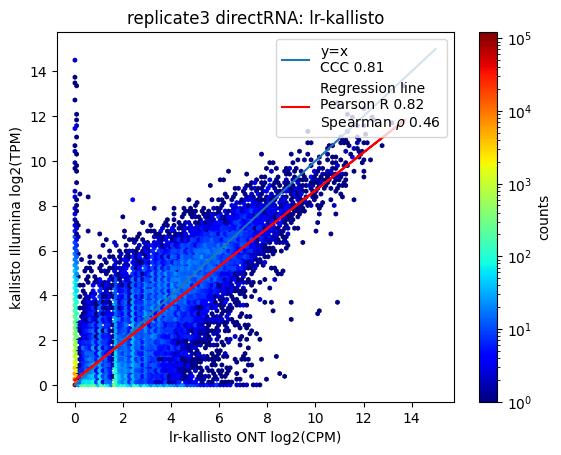

replicate 3 0.62764
Pearson's r:	 0.8175705177017705
Spearman's rho:	 0.4631013648985143
Kendall's tau:	 0.40622819278129413
0.8429790354694903


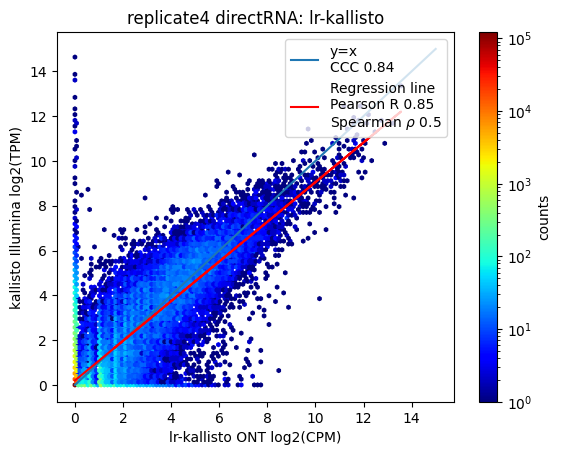

replicate 4 0.57434
Pearson's r:	 0.8493930860995396
Spearman's rho:	 0.5000203470671257
Kendall's tau:	 0.4405548046592965
0.7288049014535174


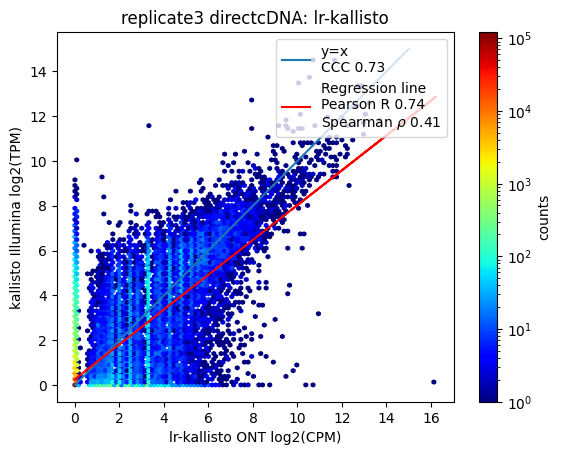

replicate 3 0.76049
Pearson's r:	 0.7364441096244027
Spearman's rho:	 0.41169354037104167
Kendall's tau:	 0.35961176943895395
0.8833791585180443


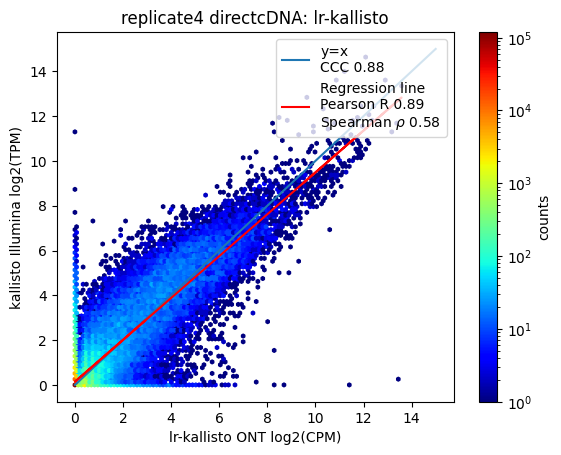

replicate 4 0.49665
Pearson's r:	 0.887986497284731
Spearman's rho:	 0.5782556599117877
Kendall's tau:	 0.5095752401422449


In [7]:
from scipy.io import mmread
import pandas as pd
import numpy as np
import scipy

def LRGASP_comp_lr(rep):
    count = mmread('HCT116/'+rep+'/matrix.abundance.mtx')

    labels = pd.read_csv('HCT116/'+rep+'/transcripts.txt', header=None, sep='\t')

    count_bus = pd.DataFrame(count.todense().T, columns=['bus_counts'])
    count_bus['transcript_id'] = [labels.values[i][0] for i in range(np.shape(labels.values)[0])]
    
    count_bus.set_index('transcript_id')
    #count_bus = count_bus[count_bus['bus_counts'] >= 1]
    count_bus['bus_counts'] = 1000000*count_bus['bus_counts']/np.sum(np.array(count_bus['bus_counts']).flatten())

    count_bus.to_csv('HCT116/'+rep+'_lr_bus_quant_tcc.tsv', sep="\t", columns=['transcript_id','bus_counts'], header=1, index=0)

    #count_bus[[s for s in count_bus['transcript_id'] if 'SIRV' in s.upper()]].to_csv('HCT116/'+rep+'_lr_bus_quant_tcc_sirv.tsv', sep="\t", columns=['transcript_id','bus_counts'], header=1, index=0)

def LRGASP_comp_sr(rep):
    count = mmread('HCT116/'+rep+'/matrix.abundance.tpm.mtx')
    print(rep, np.shape(count))

    labels = pd.read_csv('HCT116/'+rep+'/transcripts.txt', header=None, sep='\t')

    count_bus = pd.DataFrame(count.todense().T, columns=['bus_counts'])
    count_bus['transcript_id'] = [labels.values[i][0] for i in range(np.shape(labels.values)[0])]
    # # Don't remove for LRGASP evaluation [labels.values[i][0].split('.')[0] for i in range(np.shape(labels.values)[0])]
    count_bus.set_index('transcript_id')
    #count_bus = count_bus[count_bus['bus_counts'] >= 1]

    count_bus.to_csv('HCT116/'+rep+'_bus_quant_tcc.tsv', sep="\t", columns=['transcript_id','bus_counts'], header=1, index=0)
    #count_bus[[s for s in count_bus['transcript_id'] if 'SIRV' in s.upper()]].to_csv('HCT116/'+rep+'_bus_quant_tcc_sirv.tsv', sep="\t", columns=['transcript_id','bus_counts'], header=1, index=0)
    #print(count_bus[[s for s in count_bus['transcript_id'] if 'SIRV' in s.upper() ]])

LRGASP_comp_lr('replicate3_directcDNA')
LRGASP_comp_lr('replicate3_directRNA')
#LRGASP_comp_lr('replicate3-k31')
#LRGASP_comp_sr('replicate3_sr')
#LRGASP_comp_lr('replicate4_k31')
LRGASP_comp_lr('replicate4_directcDNA')
LRGASP_comp_lr('replicate4_directRNA')
#LRGASP_comp_sr('replicate4_sr')

from permetrics.regression import RegressionMetric
import matplotlib.pyplot as plt

def c_ccc(y_pred, y_true):
        cor = np.corrcoef(y_true, y_pred)[0][1]
        # Means
        mean_true = np.mean(y_true)
        mean_pred = np.mean(y_pred)
        # Population variances
        var_true = np.var(y_true)
        var_pred = np.var(y_pred)
        # Population standard deviations
        sd_true = np.std(y_true)
        sd_pred = np.std(y_pred)
        # Calculate CCC
        numerator = 2 * cor * sd_true * sd_pred
        denominator = var_true + var_pred + (mean_true - mean_pred)**2
        ccc = numerator / denominator
        return ccc

def comparison(rep):
    count_rep3 = pd.read_csv(
        'HCT116/'+"replicate3_"+rep+"_lr_bus_quant_tcc.tsv",
        header=0,
        sep="\t",
        names=['transcript_id', 'rep3'],
    )

    '''
    count_rep3_k31 = pd.read_csv(
        'HCT116/'+"replicate3-k31_lr_bus_quant_tcc.tsv",
        header=0,
        sep="\t",
        names=['transcript_id', 'rep3_k31'],
    )
    '''
    
    count_rep3_sr = pd.read_csv(
        'HCT116/'+"replicate3_sr_bus_quant_tcc.tsv",
        header=0,
        sep="\t",
        names=['transcript_id', 'rep3_sr'],
    )

    count_rep4 = pd.read_csv(
        'HCT116/'+"replicate4_"+rep+"_lr_bus_quant_tcc.tsv",
        header=0,
        sep="\t",
        names=['transcript_id', 'rep4'],
    )

    '''
    count_rep4_k31 = pd.read_csv(
        'HCT116/'+"replicate4_k31_lr_bus_quant_tcc.tsv",
        header=0,
        sep="\t",
        names=['transcript_id', 'rep4_k31'],
    )
    '''

    count_rep4_sr = pd.read_csv(
        'HCT116/'+"replicate4_sr_bus_quant_tcc.tsv",
        header=0,
        sep="\t",
        names=['transcript_id', 'rep4_sr'],
    )

    count = count_rep3.merge(count_rep3_sr, how="outer", on="transcript_id")
    #count = count.merge(count_rep3_k31, how="outer", on="transcript_id")
    count = count.merge(count_rep4, how="outer", on="transcript_id")
    #count = count.merge(count_rep4_k31, how="outer", on="transcript_id")
    count = count.merge(count_rep4_sr, how="outer", on="transcript_id")
    count.fillna(0)

    x = count["rep3"]
    y = count["rep3_sr"]
    y, x = y/np.sum(y)*1000000 + 1,x/np.sum(x)*1000000 + 1
    x = np.array(np.log2(x)).flatten()
    y = np.array(np.log2(y)).flatten()

    ccc = c_ccc(x,y)

    print(ccc)
    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log')
    plt.plot([i for i in range(0, 16)],[i for i in range(0, 16)], label='y=x\nCCC '+str(round(ccc,2)))

    plt.colorbar(label='counts')
    plt.xlabel("lr-kallisto ONT log2(CPM)")
    plt.ylabel("kallisto Illumina log2(TPM)")
    plt.title("replicate3 "+rep+": lr-kallisto")
    # fitting a linear regression line
    m, b = np.polyfit(x, y, 1)

    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)

    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    # adding the regression line to the scatter plot
    plt.plot(x, m*x + b, c='r', label='Regression line\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2)))
    plt.legend()
    plt.savefig("rep3_"+rep+"_ONT_vs_Illumina_cDNA.png", dpi=300)
    plt.show()
    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    
    y, x = y/np.sum(y)*1000000 + 1,x/np.sum(x)*1000000 + 1
    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

    print("replicate 3", evaluator.normalized_root_mean_square_error())
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
    
    x = count["rep4"]
    y = count["rep4_sr"]
    y, x = y/np.sum(y)*1000000 + 1,x/np.sum(x)*1000000 + 1
    x = np.array(np.log2(x)).flatten()
    y = np.array(np.log2(y)).flatten()

    ccc = c_ccc(x,y)

    print(ccc)
    plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log')
    plt.plot([i for i in range(0, 16)],[i for i in range(0, 16)], label='y=x\nCCC '+str(round(ccc,2)))
    plt.colorbar(label='counts')
    plt.xlabel("lr-kallisto ONT log2(CPM)")
    plt.ylabel("kallisto Illumina log2(TPM)")
    plt.title("replicate4 "+rep+": lr-kallisto")
    m, b = np.polyfit(x, y, 1)

    evaluator = RegressionMetric(np.array(y), np.array(x), decimal=5)
    
    r, p = scipy.stats.pearsonr(x, y)  # Pearson's r
    rho = scipy.stats.spearmanr(x, y)[0]  # Spearman's rho
    tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
    # adding the regression line to the scatter plot
    plt.plot(x, m*x + b, c='r', label='Regression line\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2)))
    plt.legend()
    plt.savefig("rep4_"+rep+"_ONT_vs_Illumina_cDNA.png", dpi=300)
    plt.show()

    print("replicate 4", evaluator.normalized_root_mean_square_error())
    print("Pearson's r:\t", r)
    print("Spearman's rho:\t", rho)
    print("Kendall's tau:\t", tau)
comparison("directRNA")
comparison("directcDNA")

In [ ]:
import os

def run(cdna_ref, bs, fastq):
    os.system("./../LRGASP_data/minimap2-2.28_x64-linux/minimap2 -t 32 -ax map-ont -N 100 "+cdna_ref+" "+fastq+" > "+bs+".sam")
    os.system("samtools view -bS -o "+bs+".bam "+bs+".sam")
    os.system("oarfish --alignments "+bs+".bam --threads 32 --output "+bs+"_oarfish --model-coverage --filter-group no-filters")

run("hg38_sequins_SIRV_ERCCs_longSIRVs_cdna.fa", "directcDNA_rep3", "SGNex_Hct116_directcDNA_replicate3_run2.fastq.gz")
run("hg38_sequins_SIRV_ERCCs_longSIRVs_cdna.fa", "directcDNA_rep4", "SGNex_Hct116_directcDNA_replicate4_run1.fastq.gz")

/tmp/ipykernel_165833/909830061.py:52: RuntimeWarning: divide by zero encountered in divide
  mrd = np.abs(y - x) / y
/tmp/ipykernel_165833/909830061.py:52: RuntimeWarning: invalid value encountered in divide
  mrd = np.abs(y - x) / y


MRD nan
nrmse 0.7660778962438647
0.7009806651887933
Pearson's r:	 0.705087217611231
Spearman's rho:	 0.42900633526403414
Kendall's tau:	 0.3744801505068069


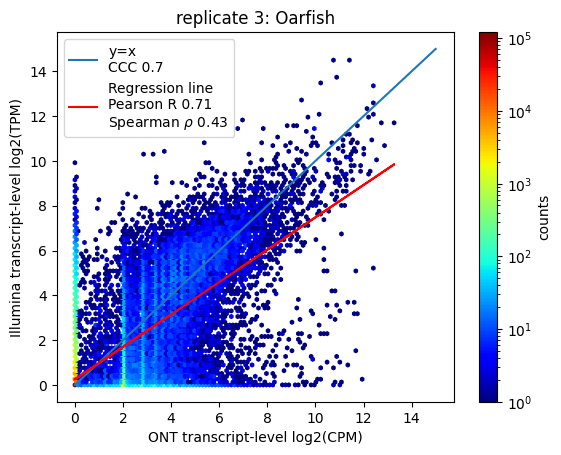

/tmp/ipykernel_165833/909830061.py:52: RuntimeWarning: divide by zero encountered in divide
  mrd = np.abs(y - x) / y
/tmp/ipykernel_165833/909830061.py:52: RuntimeWarning: invalid value encountered in divide
  mrd = np.abs(y - x) / y


MRD nan
nrmse 0.5622451421060259
0.832081409064987
Pearson's r:	 0.8351794854540597
Spearman's rho:	 0.6067046002474715
Kendall's tau:	 0.5265497886076177


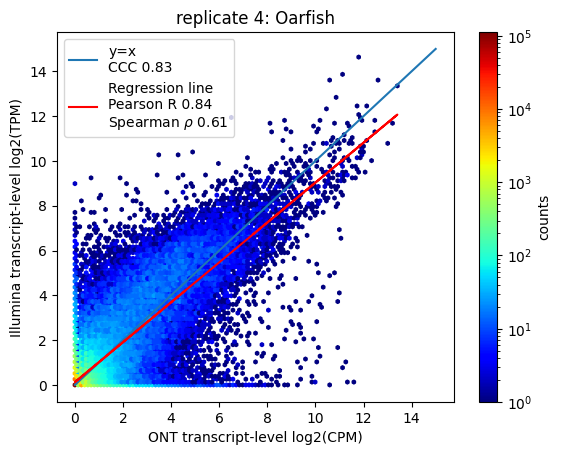

/tmp/ipykernel_165833/909830061.py:52: RuntimeWarning: divide by zero encountered in divide
  mrd = np.abs(y - x) / y
/tmp/ipykernel_165833/909830061.py:52: RuntimeWarning: invalid value encountered in divide
  mrd = np.abs(y - x) / y


MRD nan
nrmse 0.7271197184369971
0.7308146804271469
Pearson's r:	 0.7356213213210491
Spearman's rho:	 0.4367947725107896
Kendall's tau:	 0.38252505839051243


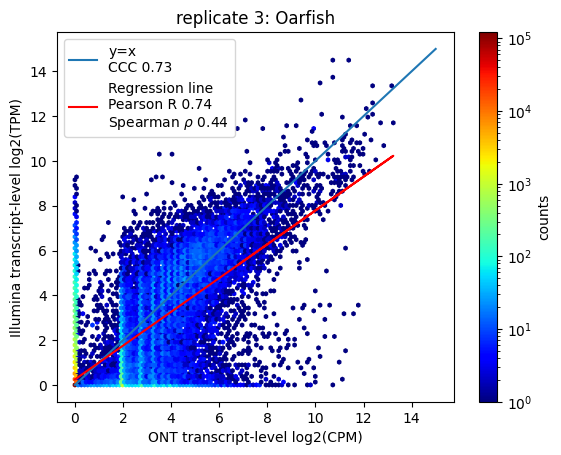

/tmp/ipykernel_165833/909830061.py:52: RuntimeWarning: divide by zero encountered in divide
  mrd = np.abs(y - x) / y
/tmp/ipykernel_165833/909830061.py:52: RuntimeWarning: invalid value encountered in divide
  mrd = np.abs(y - x) / y


MRD nan
nrmse 0.512850587129891
0.8601912762555346
Pearson's r:	 0.864405563801499
Spearman's rho:	 0.6257870979346276
Kendall's tau:	 0.5473870019696537


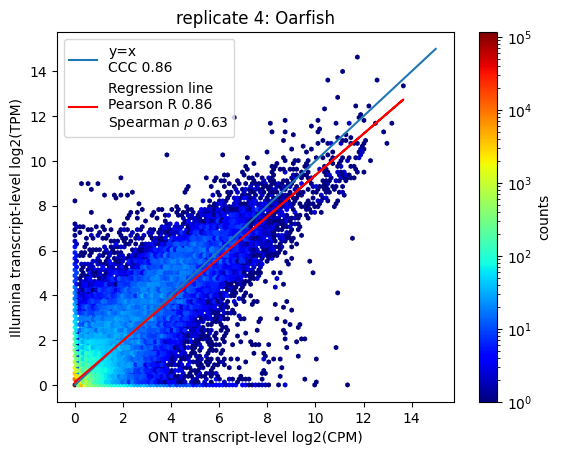

<Figure size 640x480 with 0 Axes>

In [5]:
from scipy.io import mmread
import pandas as pd
import numpy as np
import scipy
from permetrics.regression import RegressionMetric
import matplotlib.pyplot as plt

def c_ccc(y_pred, y_true):
        cor = np.corrcoef(y_true, y_pred)[0][1]
        # Means
        mean_true = np.mean(y_true)
        mean_pred = np.mean(y_pred)
        # Population variances
        var_true = np.var(y_true)
        var_pred = np.var(y_pred)
        # Population standard deviations
        sd_true = np.std(y_true)
        sd_pred = np.std(y_pred)
        # Calculate CCC
        numerator = 2 * cor * sd_true * sd_pred
        denominator = var_true + var_pred + (mean_true - mean_pred)**2
        ccc = numerator / denominator
        return ccc

def comparison_oarfish(long, rep):
        if rep == "replicate 3":
            count_sr = pd.read_csv(
                'HCT116/'+"replicate3_sr_bus_quant_tcc.tsv",
                header=0,
                sep="\t",
                names=['transcript_id', 'sr_bus_counts'],
            )
        else: 
            count_sr = pd.read_csv(
                'HCT116/'+"replicate4_sr_bus_quant_tcc.tsv",
                header=0,
                sep="\t",
                names=['transcript_id', 'sr_bus_counts'],
            )
        count = pd.read_csv(long, sep = '\t', names=['transcript_id', 'length', 'reads_count'], header=0)
        count['reads_count'] = 1000000*count['reads_count']/np.sum(np.array(count['reads_count']).flatten())
        count_bus_lr = count[count['reads_count'] > 0]

        count = count_sr.merge(count_bus_lr, how='outer', on='transcript_id')
        count = count.fillna(0)
        #print(count) 

        x = (count['reads_count'])
        y = (count['sr_bus_counts'])
        x = np.array(np.log2(x+1)).flatten()
        y = np.array(np.log2(y+1)).flatten()
        mrd = np.abs(y - x) / y
        print('MRD', np.median(mrd))
        print('nrmse', np.sqrt(np.mean(np.square(x-y),axis=0)) / np.std(y, axis=0))
        #y, x = y/np.sum(y)*1000000 + 1,x/np.sum(x)*1000000 + 1

        r, p = scipy.stats.pearsonr(x,y)   # Pearson's r
        rho = scipy.stats.spearmanr(x,y).correlation   # Spearman's rho
        tau = scipy.stats.kendalltau(x, y)[0]  # Kendall's tau
        m, b = np.polyfit(x, y, 1)

        ccc = c_ccc(x, y)
        
        print(ccc)
        
        print("Pearson's r:\t", r)
        print("Spearman's rho:\t", rho)
        print("Kendall's tau:\t", tau)
        plt.hexbin(x, y, gridsize=100, cmap='jet', bins='log')
        plt.plot([i for i in range(0, 16)],[i for i in range(0, 16)], label='y=x\nCCC '+str(round(ccc,2))) 
        plt.colorbar(label='counts')

        plt.xlabel("ONT transcript-level log2(CPM)")
        plt.ylabel("Illumina transcript-level log2(TPM)")
        plt.title(rep+": Oarfish")
        plt.plot(x, m*x + b, c='r', label='Regression line\nPearson R '+str(round(r,2))+'\nSpearman '+r"$\rho$"+' '+str(round(rho,2)))
        plt.legend(loc='upper left')
        plt.savefig("oarfish_HCT116_"+rep+".png", dpi=300)
        plt.show()
        plt.clf()

comparison_oarfish("HCT116/directcDNA_rep3_oarfish.quant", 'replicate 3')
comparison_oarfish("HCT116/directcDNA_rep4_oarfish.quant", 'replicate 4')
comparison_oarfish("HCT116/directcDNA_rep3_oarfishv0.5.1.quant", 'replicate 3')
comparison_oarfish("HCT116/directcDNA_rep4_oarfishv0.5.1.quant", 'replicate 4')

